#Python Project: Credit Card Customer Churn Prediction <br>
1. Data Description<br>
2. Data Cleaning<br>
3. Data Preprocessing<br>
4. Exploratory Data Analysis<br>
5. Data Transformation (Train and test) <br>
6. Statistics (xtrain, xtest, ytrain, ytest)<br>
7. Models <br>
8. Comparison (Confusion Matrix etc) <br>
9. Conclusion <br>


In [311]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [312]:
path = '/content/drive/MyDrive/Colab Notebooks/customer credit churn.csv'

In [246]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from imblearn.over_sampling import SMOTE

In [313]:
#read file
credit = pd.read_csv(path)
print("Number of rows and columns in the dataset: ", credit.shape)
credit.head(5)

Number of rows and columns in the dataset:  (10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [248]:
#Column name in dataset
credit.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

#Data Preprocessing


In [249]:
#Data Preprocessing
credit.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
            axis=1,inplace=True)   #Dropping two columns 


In [250]:
credit.shape

(10127, 21)

In [251]:
credit.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [252]:
credit.info()  #Checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [253]:
#Separating decription of categorical and continous variable
credit.describe().T
#Total of numerical variable
#print((len(credit.describe().T)))

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [254]:
credit.describe(include='O').T
#len(credit.describe(include='O').T)

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [255]:
#Cheking for missing values
credit.isna().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [256]:
credit.duplicated().any()

False

#EDA<br>

In [257]:
import matplotlib as plt
%matplotlib inline
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import seaborn as sns

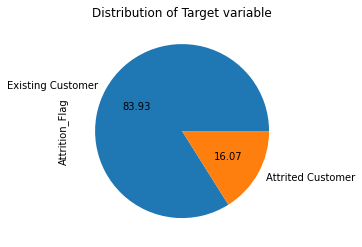

In [259]:
#Graph for Target var: Data set has 89.93 % of Existing Custoner while 16.07 of Attrited customer(who left the bank)
graph=credit.Attrition_Flag.value_counts().plot(kind = 'pie', autopct='%.2f',title='Distribution of Target variable')    

In [260]:
sub = make_subplots(rows=2,cols=1)
box= go.Box(x=credit['Customer_Age'] , name='Box Plot of Age', boxmean=True)
sub.add_trace(box,row=1,col=1)
sub.update_layout(height=500,width=1200, title='Distribution of Customer Ages')
sub.show()


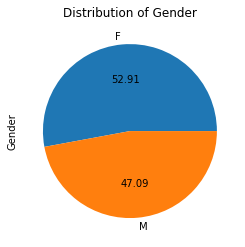

In [261]:
credit.Gender.value_counts().plot(kind = 'pie', autopct='%.2f',title='Distribution of Gender')

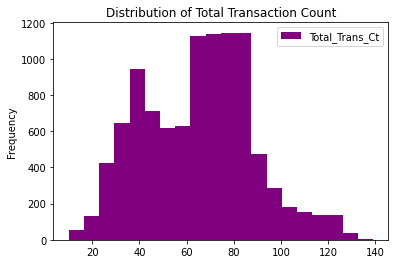

In [262]:
#credit.Total_Trans_Ct.value_counts().plot(kind = 'bar',width=)
credit.plot(y="Total_Trans_Ct", kind = 'hist', bins=20, color='purple', title='Distribution of Total Transaction Count')

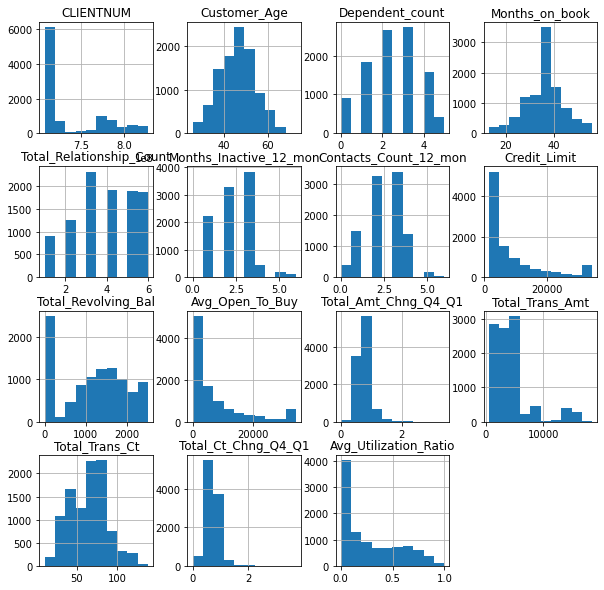

In [265]:
#Visualisation of overall dataset (Numeric vars)
credit.hist(figsize=(10,10));

#Bivariate Analysis: Comapring input variable with target variable<br>


In [267]:
plt.rcParams['figure.figsize']=(12,8)
def bivariate(bi):
   plt.subplot(1,2,1)
   sns.histplot(data=credit, x=bi,hue='Attrition_Flag',kde=True)

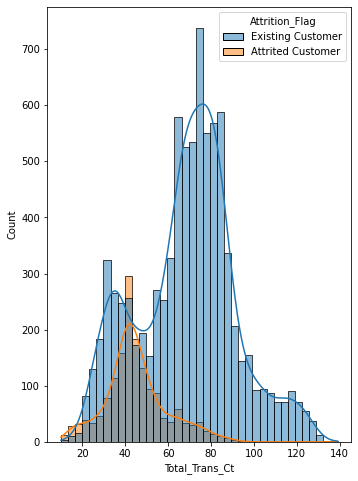

In [268]:
bivariate('Total_Trans_Ct')

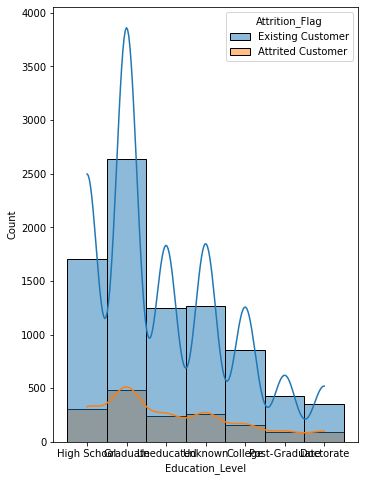

In [269]:
bivariate('Education_Level')

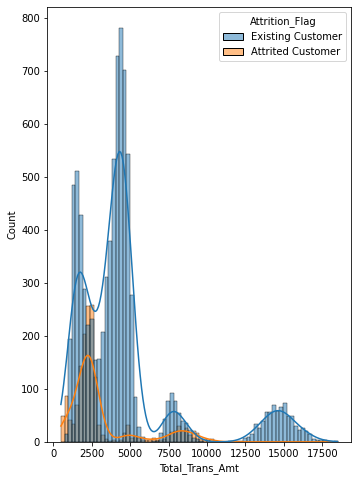

In [270]:
bivariate('Total_Trans_Amt')

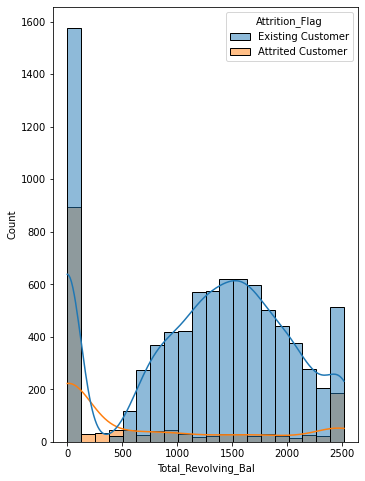

In [271]:
bivariate('Total_Revolving_Bal')

In [272]:
pearson_corr = credit.corr(method='pearson')
pearson_corr

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


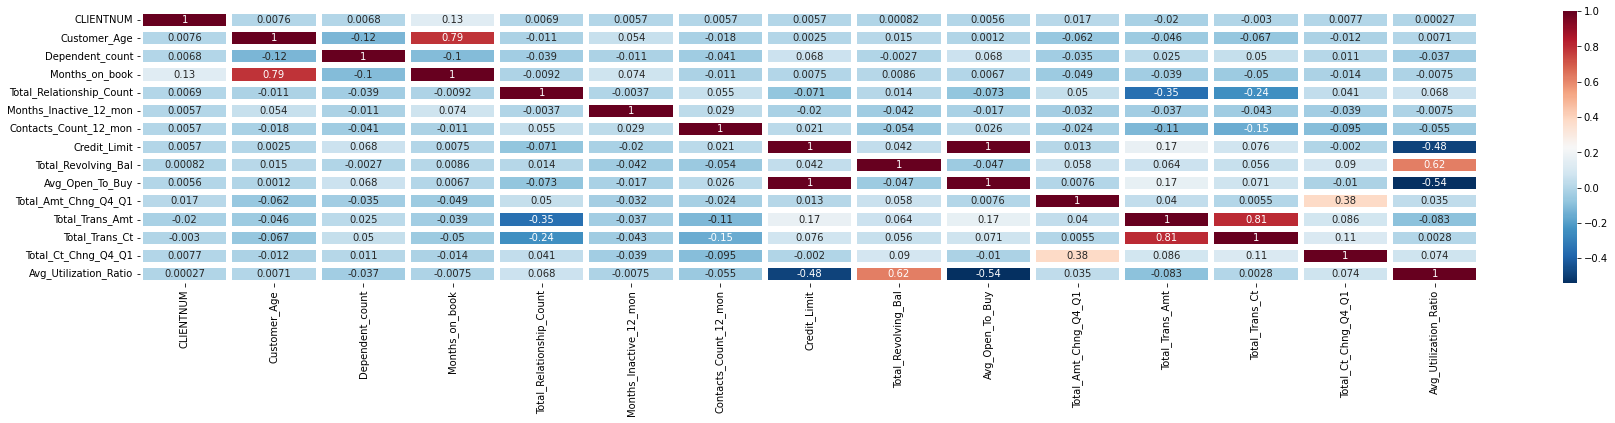

In [274]:
plt.figure(figsize = (30,5))     #Heatmap : to show association between variables(here numeric variables only)
sns.heatmap(pearson_corr,
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=5);

In [275]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

In [276]:
credit = credit.replace({'Attrition_Flag':{'Existing Customer':0,'Attrited Customer':1}})   #Target Variable
credit.tail(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,1,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [277]:
x=credit.drop(['CLIENTNUM','Attrition_Flag'],axis=1)        #Target variable dropped from the edataset
y=credit['Attrition_Flag']                                  #Dataset as having target variable

In [278]:
category=x.select_dtypes(include='object').columns
category

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [279]:
x_category=pd.get_dummies(x[category], drop_first=True)    #Converting categorical variable to dummy variable
#x_category

In [280]:
numeric=x.select_dtypes(exclude='object').columns
numeric

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [281]:
tran=PowerTransformer()                                   #Used to deal with skewness of data
x_numeric=tran.fit_transform(x[numeric])                  #passing numeric data
x_numeric=pd.DataFrame(x_numeric,columns=numeric)
#x_numeric

In [282]:
x=pd.concat([x_category,x_numeric],axis=1)
#x

In [283]:
#Splitting data: train:80%, test=20%, stratify=y: preserving portion of target variable into train and test dataset. Random state control randomly splitted data into fix number
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)    

In [194]:
from sklearn.metrics import precision_recall_curve,auc
from sklearn.metrics import make_scorer

#Model Bulding

In [284]:
def accuracy(y_t,y_p):
    precision,recall,_=precision_recall_curve(y_t,y_p)
    return auc(recall,precision)

In [285]:
metric=make_scorer(accuracy,needs_proba=True)

In [286]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

In [287]:
fs_rf=SelectFromModel(RandomForestClassifier()).fit(x_train,y_train)
rf=pd.Series(fs_rf.estimator_.feature_importances_,index=x_train.columns).sort_values(ascending=False)

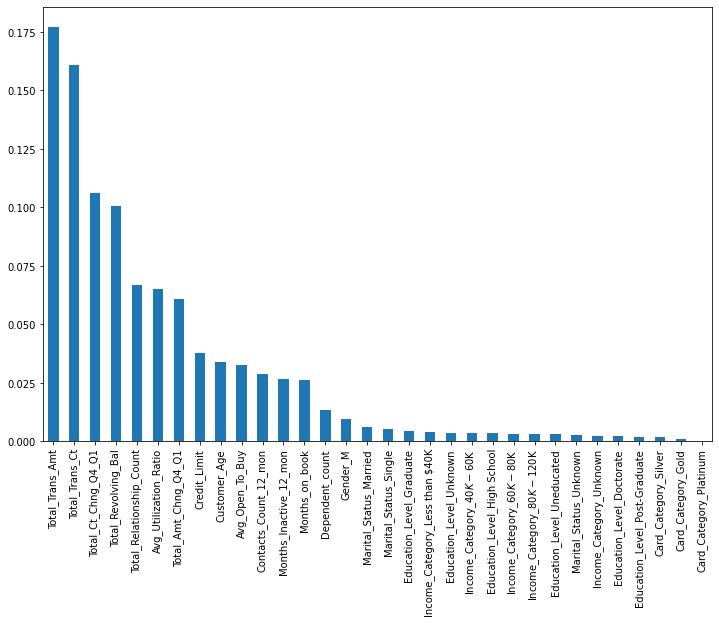

In [288]:
rf.plot(kind='bar');

In [289]:
xgb=SelectFromModel(XGBClassifier()).fit(x_train,y_train)
xgb=pd.Series(xgb.estimator_.feature_importances_,index=x_train.columns).sort_values(ascending=False)

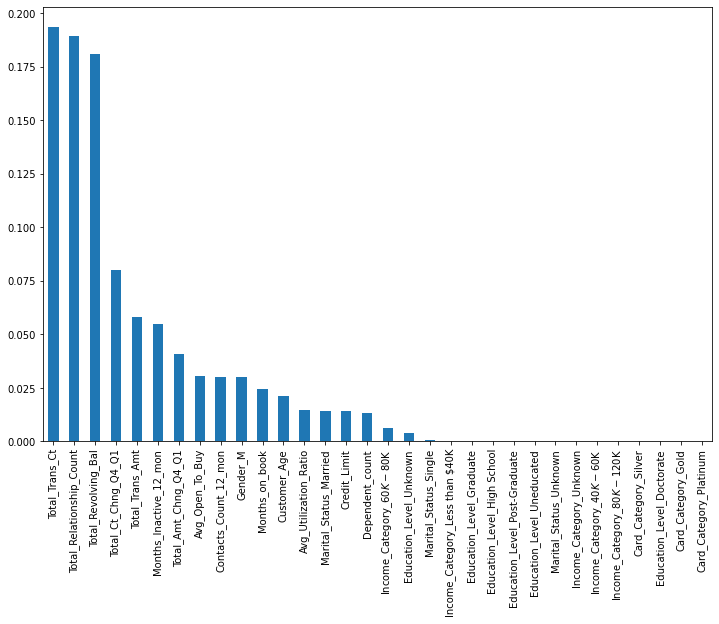

In [290]:
xgb.plot(kind='bar');


In [291]:
feature= ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
           'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
           'Total_Relationship_Count', 'Avg_Open_To_Buy', 'Credit_Limit',
           'Customer_Age', 'Contacts_Count_12_mon', 'Months_on_book',
           'Months_Inactive_12_mon', 'Dependent_count'] 

In [292]:
x_train=x_train[feature]
x_test=x_test[feature]

In [293]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [294]:
def models():
    model=[]
    name=[]
    model.append(LogisticRegression())
    name.append('logisticr')               
    model.append(RandomForestClassifier())
    name.append('randomf')
    model.append(XGBClassifier())
    name.append('xgb')
    return model,name

In [295]:
def final_graph(x,y):
    
    model,name=models()
    results=[]
    
    for i in range(len(model)):
        cv=StratifiedKFold(n_splits=5)
        scores=cross_val_score(model[i],x,y,scoring=metric,cv=cv)
        
        results.append(scores)
        
    plt.boxplot(results,labels=name,showmeans=True);


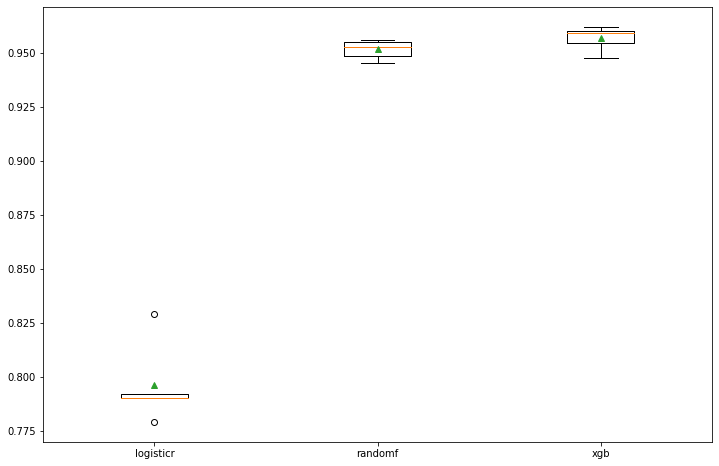

In [296]:
final_graph(x_train,y_train)  #from below graph, Gradient Boosting has high accuracy

In [297]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_p=model.predict_proba(x_test)

In [298]:
precision,recall,thresholds=precision_recall_curve(y_test,y_p[:,1])  
print(f'Precision_recall_curve-AREA: {auc(recall,precision)}')  #Accuracy of Logistic Regression Model (Lowest)

Precision_recall_curve-AREA: 0.772395700623604


In [299]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_p=model.predict_proba(x_test)

In [300]:
precision,recall,thresholds=precision_recall_curve(y_test,y_p[:,1])
print(f'Precision_recall_curve-AREA: {auc(recall,precision)}')      #Accuracy of Random Forest Classifier Model

Precision_recall_curve-AREA: 0.9497466624206045


In [301]:
model=XGBClassifier()
model.fit(x_train,y_train)
y_p=model.predict_proba(x_test)

In [302]:
precision,recall,thresholds=precision_recall_curve(y_test,y_p[:,1])
print(f'Precision_recall_curve-AREA: {auc(recall,precision)}')        #Accuracy of Gradient boosting Model (Highest)

Precision_recall_curve-AREA: 0.9569124834107288


#Conclusion<br>
Extreme Gradient Boosting Model has best performance for this dataset

Text(0, 0.5, 'Precision')

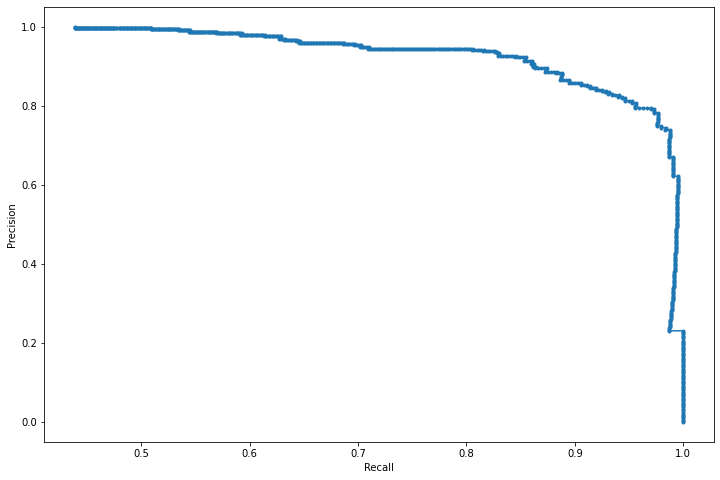

In [303]:
plt.plot(precision,recall, marker='.', label='Xgboost');
plt.xlabel('Recall')
plt.ylabel('Precision')

In [304]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

In [305]:
f1_score = (2*precision*recall)/(precision+recall)   #Calculating F1 score to check the accuracy
ix = np.argmax(f1_score)
thresh=thresholds[ix]

print('Best Threshold=%f, f1_score=%.3f' % (thresholds[ix], f1_score[ix]))

Best Threshold=0.264892, f1_score=0.888


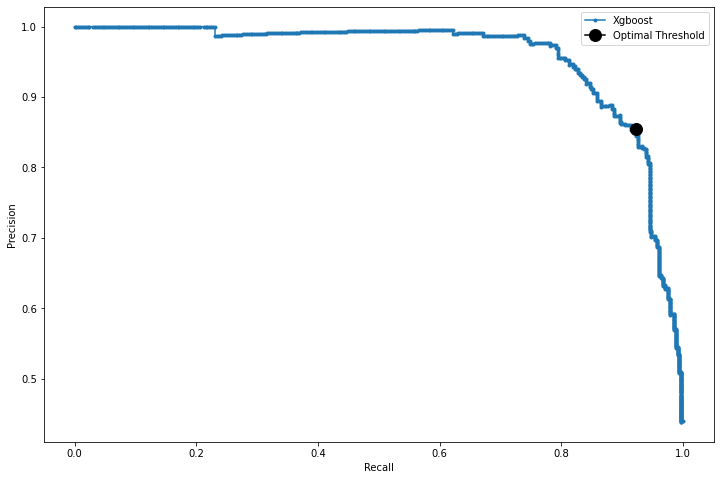

In [306]:
plt.plot(recall, precision, marker='.', label='Xgboost');
plt.plot(recall[ix],precision[ix],marker='o', markersize=12,color='black',label='Optimal Threshold');
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [307]:
y_pred=(y_p[:,1]>=thresh)


In [308]:
print(f'Final_Classification_report: \n\n{classification_report(y_test,y_pred)}')


Final_Classification_report: 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1701
           1       0.85      0.92      0.89       325

    accuracy                           0.96      2026
   macro avg       0.92      0.95      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [309]:
value=['Existing Customer','Attrited Customer']
churn=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=value,index=value)

Text(50.99999999999999, 0.5, 'True Label')

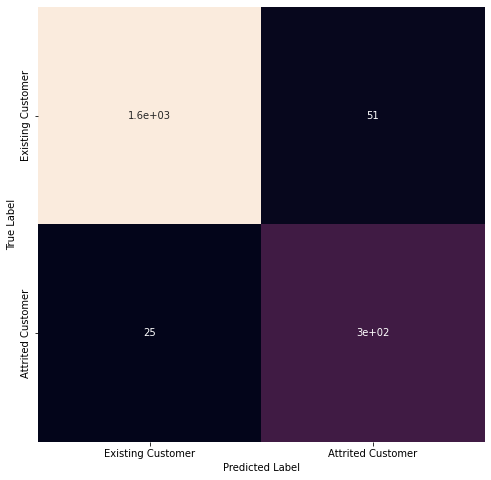

In [310]:
plt.figure(figsize=(8,8))
sns.heatmap(churn,annot=True,cbar=False);
plt.xlabel('Predicted Label')
plt.ylabel('True Label')